In [107]:
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import statistics
from statistics import mode
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings

In [108]:
df1 = pd.read_csv("C:/Users/leena/OneDrive/Documents/Leena/archive/4-wheeler-EV-carwale.csv")

In [109]:
df1.head()

review  Exterior  Comfort  \
0  Superb car like as fantastic as petroleum car....       5.0      4.0   
1  Anti national, worst service, worst customer c...       1.0      1.0   
2           Super happy with it. The car is too good       4.0      5.0   
3  Pretty good car, smooth as a glider fast car, ...       5.0      5.0   
4  Price difference between petrol and electronic...       4.0      4.0   

   Performance  Fuel Economy  Value for Money      Condition  \
0          5.0           5.0              5.0            New   
1          1.0           1.0              1.0            New   
2          5.0           5.0              4.0            New   
3          5.0           5.0              5.0            New   
4          5.0           3.0              2.0  Not Purchased   

                    driven  rating    model_name  
0   Few hundred kilometers     5.0  hyundai kona  
1        Haven't driven it     0.0  hyundai kona  
2  Few thousand kilometers     5.0  hyundai kona  
3  Few thousand kilometers     5.0  hyundai kona  
4        Haven't driven it     3.0  hyundai kona

In [110]:
df1.shape

(129, 10)

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           129 non-null    object 
 1   Exterior         129 non-null    float64
 2   Comfort          129 non-null    float64
 3   Performance      129 non-null    float64
 4   Fuel Economy     129 non-null    float64
 5   Value for Money  129 non-null    float64
 6   Condition        129 non-null    object 
 7   driven           129 non-null    object 
 8   rating           129 non-null    float64
 9   model_name       129 non-null    object 
dtypes: float64(6), object(4)
memory usage: 10.2+ KB


In [112]:
df1.describe()

Exterior     Comfort  Performance  Fuel Economy  Value for Money  \
count  129.000000  129.000000   129.000000    129.000000       129.000000   
mean     4.472868    4.418605     4.418605      4.418605         4.162791   
std      0.968871    1.036051     1.150392      1.122899         1.345076   
min      0.000000    0.000000     0.000000      0.000000         0.000000   
25%      4.000000    4.000000     4.000000      4.000000         4.000000   
50%      5.000000    5.000000     5.000000      5.000000         5.000000   
75%      5.000000    5.000000     5.000000      5.000000         5.000000   
max      5.000000    5.000000     5.000000      5.000000         5.000000   

           rating  
count  129.000000  
mean     4.341085  
std      1.389110  
min      0.000000  
25%      4.000000  
50%      5.000000  
75%      5.000000  
max      5.000000

In [113]:
# Below code gives percentage of null in every column
null_percentage = df1.isnull().sum()/df1.shape[0]*100

# Below code gives list of columns having more than 60% null
col_to_drop = null_percentage[null_percentage>60].keys()
df2=df1.drop(col_to_drop,axis=1)

In [114]:
df2.head()

review  Exterior  Comfort  \
0  Superb car like as fantastic as petroleum car....       5.0      4.0   
1  Anti national, worst service, worst customer c...       1.0      1.0   
2           Super happy with it. The car is too good       4.0      5.0   
3  Pretty good car, smooth as a glider fast car, ...       5.0      5.0   
4  Price difference between petrol and electronic...       4.0      4.0   

   Performance  Fuel Economy  Value for Money      Condition  \
0          5.0           5.0              5.0            New   
1          1.0           1.0              1.0            New   
2          5.0           5.0              4.0            New   
3          5.0           5.0              5.0            New   
4          5.0           3.0              2.0  Not Purchased   

                    driven  rating    model_name  
0   Few hundred kilometers     5.0  hyundai kona  
1        Haven't driven it     0.0  hyundai kona  
2  Few thousand kilometers     5.0  hyundai kona  
3  Few thousand kilometers     5.0  hyundai kona  
4        Haven't driven it     3.0  hyundai kona

In [115]:
#Dataset Details

In [116]:
df2['review'] = df2['review'].astype(str)

In [117]:
import re               # regular expression
def cleaning(text):
    text = re.sub("[^0-9A-Za-z\-]+", " ", text)
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)", "", text)
    text = " ".join(text.split())
    
    text = text.lower()
    return text
# Calling the cleaning function for reviewText column
df2["review"] = df2["review"].apply(cleaning)

# Checking Information
df2.head()

review  Exterior  Comfort  \
0  superb car like as fantastic as petroleum car ...       5.0      4.0   
1  anti national worst service worst customer car...       1.0      1.0   
2            super happy with it the car is too good       4.0      5.0   
3  pretty good car smooth as a glider fast car in...       5.0      5.0   
4  price difference between petrol and electronic...       4.0      4.0   

   Performance  Fuel Economy  Value for Money      Condition  \
0          5.0           5.0              5.0            New   
1          1.0           1.0              1.0            New   
2          5.0           5.0              4.0            New   
3          5.0           5.0              5.0            New   
4          5.0           3.0              2.0  Not Purchased   

                    driven  rating    model_name  
0   Few hundred kilometers     5.0  hyundai kona  
1        Haven't driven it     0.0  hyundai kona  
2  Few thousand kilometers     5.0  hyundai kona  
3  Few thousand kilometers     5.0  hyundai kona  
4        Haven't driven it     3.0  hyundai kona

In [118]:
#Sentiment Analysis

In [119]:
# Assigning the Positive Negative and Neutral Sentiment ob the basis of overall column
a=[]
for x in df2['rating']: 
  if x>3:
    x='Pos'
    a.append(x)
  elif x==3:
    x='Neu'
    a.append(x)
  else:
    x='Neg'
    a.append(x)
df2['Sentiment']=a

In [120]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\leena\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [122]:
res2 = {}
t = 0
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    text = row['review']
    res2[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/129 [00:00<?, ?it/s]

In [123]:
j = pd.DataFrame(res2).T
j

neg    neu    pos  compound
0    0.000  0.571  0.429    0.9729
1    0.360  0.518  0.121   -0.8928
2    0.000  0.364  0.636    0.8885
3    0.000  0.704  0.296    0.9231
4    0.031  0.917  0.052    0.2869
..     ...    ...    ...       ...
124  0.122  0.637  0.241    0.9215
125  0.000  0.828  0.172    0.7003
126  0.000  0.763  0.237    0.9524
127  0.031  0.783  0.185    0.8908
128  0.049  0.715  0.236    0.9590

[129 rows x 4 columns]

In [124]:
df3 = pd.concat([df2, j], axis = 1)
df3

review  Exterior  Comfort  \
0    superb car like as fantastic as petroleum car ...       5.0      4.0   
1    anti national worst service worst customer car...       1.0      1.0   
2              super happy with it the car is too good       4.0      5.0   
3    pretty good car smooth as a glider fast car in...       5.0      5.0   
4    price difference between petrol and electronic...       4.0      4.0   
..                                                 ...       ...      ...   
124  a good car but overpriced a little the startin...       5.0      4.0   
125  excellent vehicle driving dynamics and evs are...       5.0      5.0   
126  after government subsidy it becomes cheaper th...       5.0      5.0   
127  yes i love tata products a true indian company...       4.0      4.0   
128  i am planning to buy i am driving this car sin...       5.0      5.0   

     Performance  Fuel Economy  Value for Money      Condition  \
0            5.0           5.0              5.0            New   
1            1.0           1.0              1.0            New   
2            5.0           5.0              4.0            New   
3            5.0           5.0              5.0            New   
4            5.0           3.0              2.0  Not Purchased   
..           ...           ...              ...            ...   
124          4.0           4.0              3.0            New   
125          5.0           5.0              5.0  Not Purchased   
126          5.0           5.0              5.0  Not Purchased   
127          4.0           5.0              5.0  Not Purchased   
128          5.0           3.0              2.0  Not Purchased   

                      driven  rating     model_name Sentiment    neg    neu  \
0     Few hundred kilometers     5.0   hyundai kona       Pos  0.000  0.571   
1          Haven't driven it     0.0   hyundai kona       Neg  0.360  0.518   
2    Few thousand kilometers     5.0   hyundai kona       Pos  0.000  0.364   
3    Few thousand kilometers     5.0   hyundai kona       Pos  0.000  0.704   
4          Haven't driven it     3.0   hyundai kona       Neu  0.031  0.917   
..                       ...     ...            ...       ...    ...    ...   
124   Did a short drive once     4.0  tata tigor ev       Pos  0.122  0.637   
125   Did a short drive once     5.0  tata tigor ev       Pos  0.000  0.828   
126   Did a short drive once     5.0  tata tigor ev       Pos  0.000  0.763   
127        Haven't driven it     5.0  tata tigor ev       Pos  0.031  0.783   
128   Few hundred kilometers     5.0  tata tigor ev       Pos  0.049  0.715   

       pos  compound  
0    0.429    0.9729  
1    0.121   -0.8928  
2    0.636    0.8885  
3    0.296    0.9231  
4    0.052    0.2869  
..     ...       ...  
124  0.241    0.9215  
125  0.172    0.7003  
126  0.237    0.9524  
127  0.185    0.8908  
128  0.236    0.9590  

[129 rows x 15 columns]

In [125]:
%%time
plt.figure(figsize = (15, 8))
plt.title('CDF Of Sentiments',fontsize=19,fontweight='bold')
sns.kdeplot(df3['neg'],bw=0.1,cumulative=True)
sns.kdeplot(df3['neu'],bw=0.1,cumulative=True)
sns.kdeplot(df3['pos'],bw=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.legend(['neg', 'neutral', 'pos'])
plt.show()

Wall time: 279 ms


In [126]:
#Comments

In [127]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leena\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [128]:
stop_words = stopwords.words("english")

In [129]:
# applying stopword function on reviewText
df3['review'] = df3['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [130]:
# For WordCloud

stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(df3['review']))
    fig = plt.figure(figsize = (15, 15))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [131]:
df3.columns

Index(['review', 'Exterior', 'Comfort', 'Performance', 'Fuel Economy',
       'Value for Money', 'Condition', 'driven', 'rating', 'model_name',
       'Sentiment', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

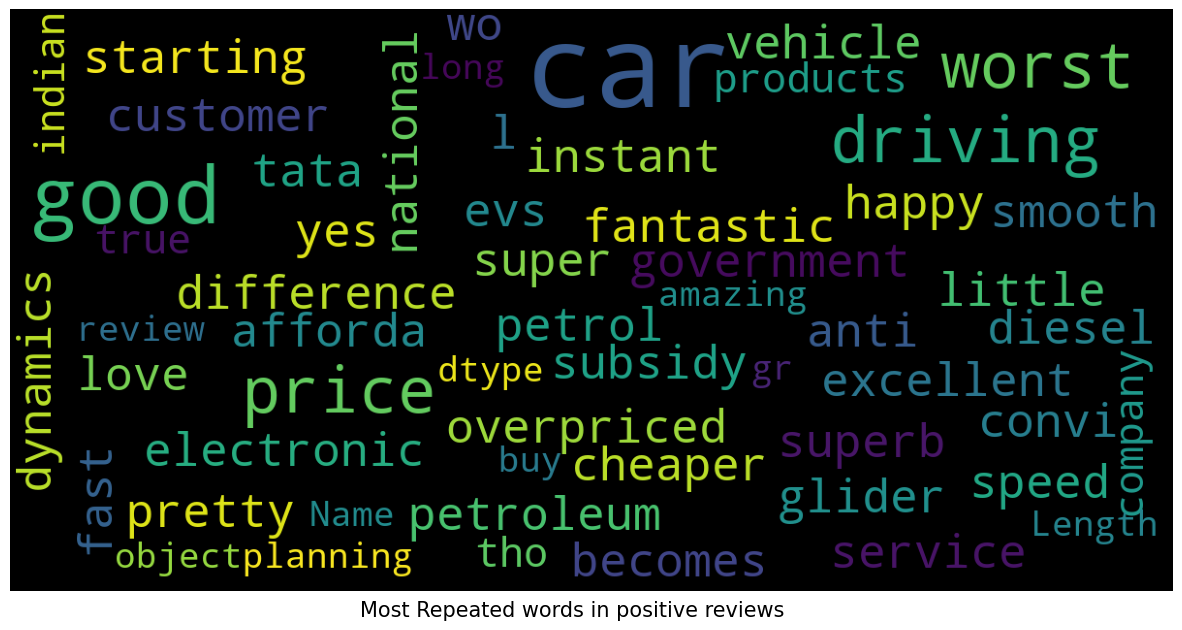

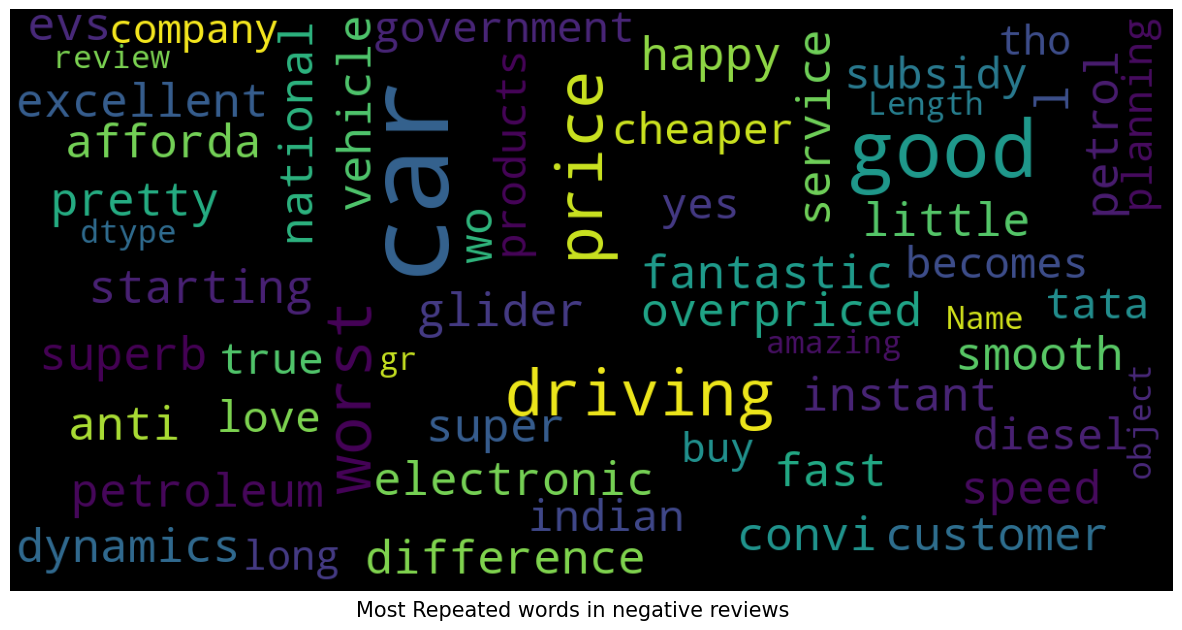

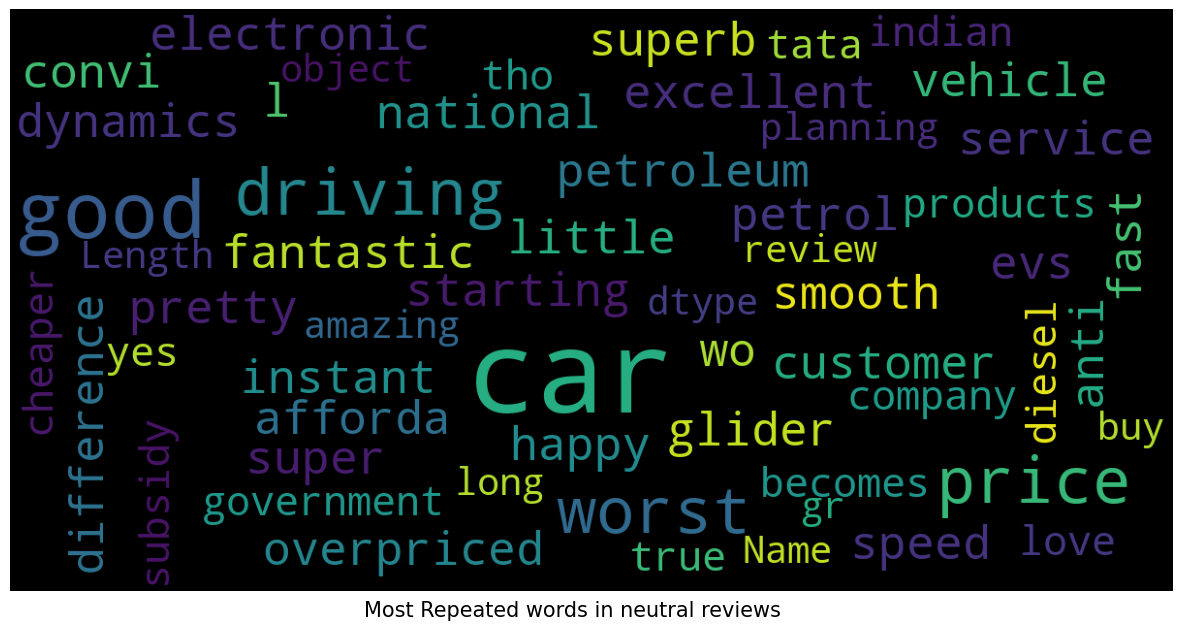

In [132]:
neg=df3[df3["Sentiment"] == "Neg"]["review"]
pos=df3[df3["Sentiment"] == "Pos"]["review"]
neu=df3[df3["Sentiment"] == "Neu"]["review"]

word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")


In [133]:
# Getting BIGRAM
def get_top_n_bigram(corpus, n):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
    
    # converting a text documents to a matrix of token counts.      
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

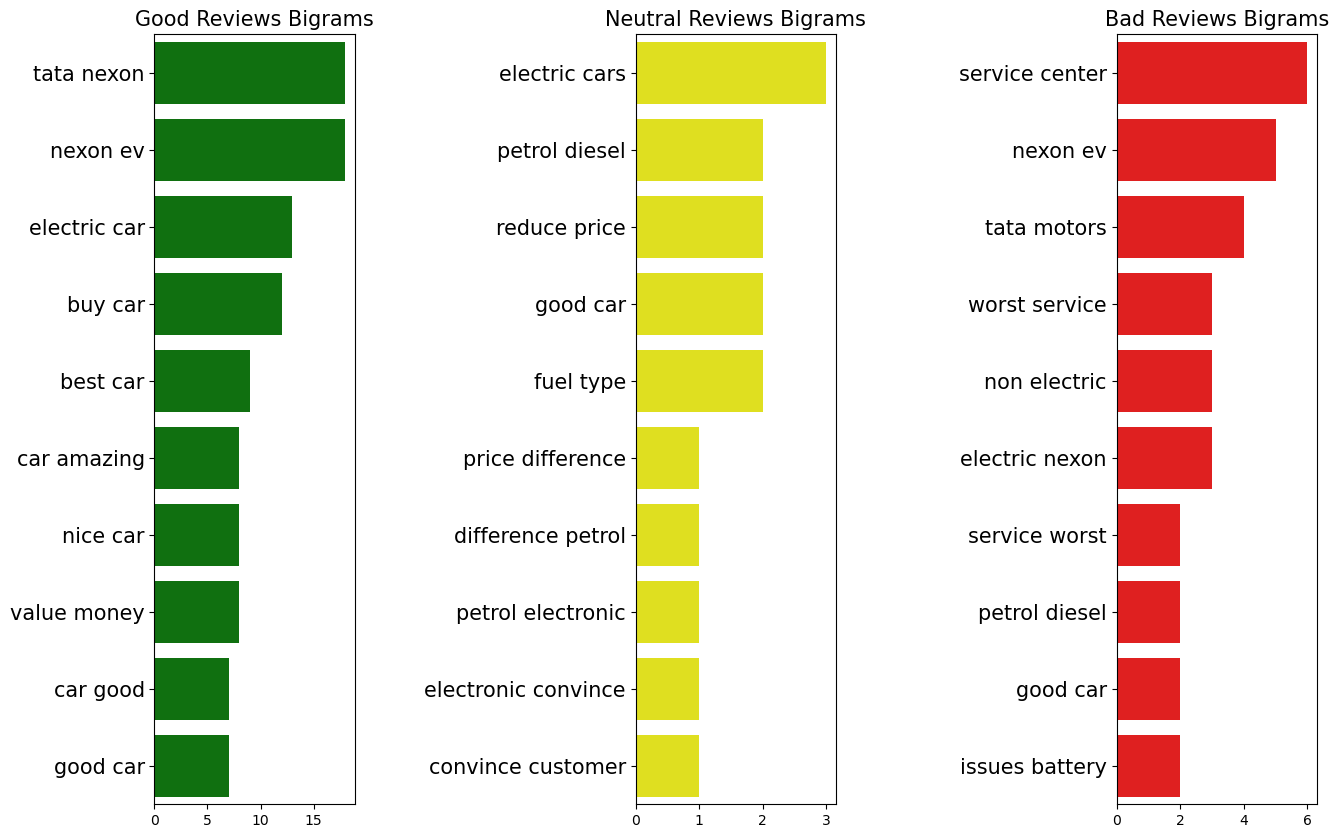

In [134]:
# create a function for bigram plots
def n_gram_plot(data,title,color):                            # Creating n_gram_plot function
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 10)                  # Calling get_top_n_bigram for pos columns
common_words_neutral = get_top_n_bigram(neu, 10)               # Calling get_top_n_bigram for neu columns
common_words_bad = get_top_n_bigram(neg, 10)                   # Calling get_top_n_bigram for neg columns

# bigram plot using function above
plt.figure(figsize=(15,10))
# good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Good','green')                  # Calling n_gram_plot for pos 
#============================================= 
#neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','yellow')           # Calling n_gram_plot for pos
#============================================= 
#bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Bad','red')                      # Calling n_gram_plot for pos
plt.show()




In [135]:
df4=df1.drop(['review','Condition', 'driven'],axis=1)

In [136]:
df4.head

<bound method NDFrame.head of      Exterior  Comfort  Performance  Fuel Economy  Value for Money  rating  \
0         5.0      4.0          5.0           5.0              5.0     5.0   
1         1.0      1.0          1.0           1.0              1.0     0.0   
2         4.0      5.0          5.0           5.0              4.0     5.0   
3         5.0      5.0          5.0           5.0              5.0     5.0   
4         4.0      4.0          5.0           3.0              2.0     3.0   
..        ...      ...          ...           ...              ...     ...   
124       5.0      4.0          4.0           4.0              3.0     4.0   
125       5.0      5.0          5.0           5.0              5.0     5.0   
126       5.0      5.0          5.0           5.0              5.0     5.0   
127       4.0      4.0          4.0           5.0              5.0     5.0   
128       5.0      5.0          5.0           3.0              2.0     5.0   

        model_name  
0     hyunda

In [137]:
df4.fillna(0)

Exterior  Comfort  Performance  Fuel Economy  Value for Money  rating  \
0         5.0      4.0          5.0           5.0              5.0     5.0   
1         1.0      1.0          1.0           1.0              1.0     0.0   
2         4.0      5.0          5.0           5.0              4.0     5.0   
3         5.0      5.0          5.0           5.0              5.0     5.0   
4         4.0      4.0          5.0           3.0              2.0     3.0   
..        ...      ...          ...           ...              ...     ...   
124       5.0      4.0          4.0           4.0              3.0     4.0   
125       5.0      5.0          5.0           5.0              5.0     5.0   
126       5.0      5.0          5.0           5.0              5.0     5.0   
127       4.0      4.0          4.0           5.0              5.0     5.0   
128       5.0      5.0          5.0           3.0              2.0     5.0   

        model_name  
0     hyundai kona  
1     hyundai kona  
2     hyundai kona  
3     hyundai kona  
4     hyundai kona  
..             ...  
124  tata tigor ev  
125  tata tigor ev  
126  tata tigor ev  
127  tata tigor ev  
128  tata tigor ev  

[129 rows x 7 columns]

In [138]:
grouped_df = df4.groupby('model_name')

In [139]:
grouped_df1 = grouped_df.mean()
a = round(grouped_df1.fillna(0))

In [140]:

dict_columns_type = {'Exterior': float,
                'Comfort': float,'Fuel Economy': float,'Performance': float,'Value for Money': float,'rating': float
               }
dfobj = a.astype(dict_columns_type)
dfobj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, hyundai kona to tata tigor ev
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Exterior         3 non-null      float64
 1   Comfort          3 non-null      float64
 2   Performance      3 non-null      float64
 3   Fuel Economy     3 non-null      float64
 4   Value for Money  3 non-null      float64
 5   rating           3 non-null      float64
dtypes: float64(6)
memory usage: 168.0+ bytes


(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 1500x800 with 0 Axes>

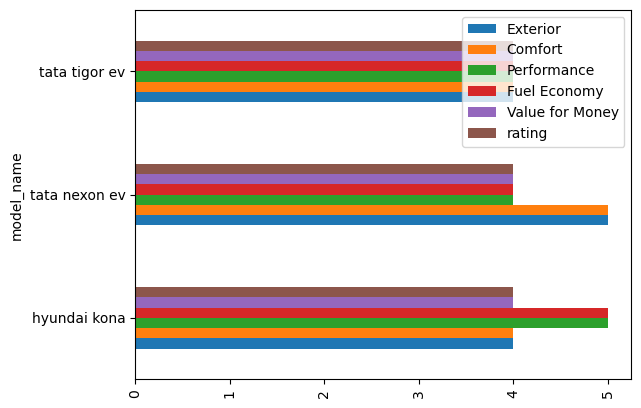

In [141]:
plt.figure(figsize = (15, 8))
a.plot.barh()
plt.xticks(rotation=90)

In [142]:
from scipy import stats
grouped_df2= grouped_df.agg(lambda x: list(stats.mode(x)[0]))
grouped_df2

Exterior Comfort Performance Fuel Economy Value for Money rating
model_name                                                                    
hyundai kona     [5.0]   [5.0]       [5.0]        [5.0]           [5.0]  [5.0]
tata nexon ev    [5.0]   [5.0]       [5.0]        [5.0]           [5.0]  [5.0]
tata tigor ev    [5.0]   [5.0]       [5.0]        [5.0]           [5.0]  [5.0]